## Numpy

In [55]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [56]:
import random 

In [57]:
def random_fill(n):
    l = [random.randint(1,100) for _ in range(n)]
    return [x+1 for x in l]


In [58]:
%%timeit -n 40 -r 10
random_fill(10_000)

8.94 ms ± 1.43 ms per loop (mean ± std. dev. of 10 runs, 40 loops each)


In [59]:
def random_fill2(n):
    l = np.random.randint(1,100,n)
    return l + 1


In [60]:
%%timeit -n 40 -r 10
random_fill2(10_000)

175 µs ± 25 µs per loop (mean ± std. dev. of 10 runs, 40 loops each)


In [61]:
norm_list = random_fill(10_000)
np_list = np.array(norm_list)

### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [62]:
from math import sin, cos

In [63]:
def sum_sin_and_cos(l):
    return [sin(x)+cos(x) for x in l]

In [64]:
%%timeit -n 40 -r 10
sum_sin_and_cos(norm_list)

4.83 ms ± 649 µs per loop (mean ± std. dev. of 10 runs, 40 loops each)


In [65]:
def sum_sin_and_cos2(l):
    return np.sin(l)+np.cos(l)

In [66]:
%%timeit -n 40 -r 10
sum_sin_and_cos2(np_list)

431 µs ± 44.4 µs per loop (mean ± std. dev. of 10 runs, 40 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [67]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

print(cube_sum(norm_list))
print(almost_variance(norm_list))

2624535987
1219954.746946039


In [68]:
%%timeit -n 40 -r 10
cube_sum(norm_list)

2.25 ms ± 440 µs per loop (mean ± std. dev. of 10 runs, 40 loops each)


In [69]:
%%timeit -n 40 -r 10
almost_variance(norm_list)

3.44 ms ± 410 µs per loop (mean ± std. dev. of 10 runs, 40 loops each)


In [70]:
def cube_sum2(x):
    """Zwraca sume szescianow elementow"""
    p = np.power(x,3)
    return np.sum(p, dtype=np.int64)

def almost_variance2(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    mean = np.mean(x)
    n = len(x)
    return np.sum((x-mean)**4)/n

print(cube_sum2(np_list))
print(almost_variance2(np_list))

2624535987
1219954.7469460205


In [71]:
%%timeit -n 40 -r 10
cube_sum2(np_list)

48.9 µs ± 6.83 µs per loop (mean ± std. dev. of 10 runs, 40 loops each)


In [72]:
%%timeit -n 40 -r 10
almost_variance2(np_list)

656 µs ± 211 µs per loop (mean ± std. dev. of 10 runs, 40 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [73]:
def multiplication_table():
    r = np.arange(1,11)
    c = r.reshape((10,1))
    print(r*c)
    
multiplication_table()

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [74]:
random_array = np.random.rand(10, 5)

def calculate_euclidean_distances(x):
    x_r = x.reshape(10, 1, 5)
    diff = x_r - x
    squared_diff = diff ** 2
    sum = np.sum(squared_diff, axis=-1)
    return sum


distances = calculate_euclidean_distances(random_array)
for i in range(10):
    print(f"z punktu {i+1}: {distances[i]}")

z punktu 1: [0.         0.70168801 0.98039472 0.28740873 0.34928517 0.63834018
 1.24358144 0.64222671 0.16453618 1.0183037 ]
z punktu 2: [0.70168801 0.         0.67181955 0.45856991 0.63255692 1.10374873
 0.735398   0.44002985 0.79897322 0.18712158]
z punktu 3: [0.98039472 0.67181955 0.         1.2509844  1.21080354 1.63424545
 0.39255145 0.63819035 0.66149327 0.69131146]
z punktu 4: [0.28740873 0.45856991 1.2509844  0.         0.06130961 0.35176355
 1.02205227 0.8048529  0.72618427 0.49650057]
z punktu 5: [0.34928517 0.63255692 1.21080354 0.06130961 0.         0.41516269
 0.84547158 1.09295986 0.7541785  0.54683182]
z punktu 6: [0.63834018 1.10374873 1.63424545 0.35176355 0.41516269 0.
 1.65259595 0.89466536 1.11536217 1.01466482]
z punktu 7: [1.24358144 0.735398   0.39255145 1.02205227 0.84547158 1.65259595
 0.         1.31637757 1.25540934 0.37162809]
z punktu 8: [0.64222671 0.44002985 0.63819035 0.8048529  1.09295986 0.89466536
 1.31637757 0.         0.64089958 0.76727913]
z punktu

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [75]:
def white(X):
    mean_values = np.mean(X, axis=0)
    std_values = np.std(X, axis=0)
    white_matrix = (X - mean_values) / std_values
    return white_matrix

matrix = np.array([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]])
print(white(matrix))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [76]:
def closest(x, A):
    np_A = np.array(A)
    i = np.abs(np_A - x).argmin()
    return np_A[i]

x = 1.5
A = [1, -4, 3]
print(closest(x, A))

1


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [77]:
def poly(x, a):
    pows_of_x = np.cumprod(np.full_like(a, x))
    return np.sum(a * pows_of_x)

coefficients = np.array([1, 2, 3])
x = 2

print(poly(x, coefficients))

34


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

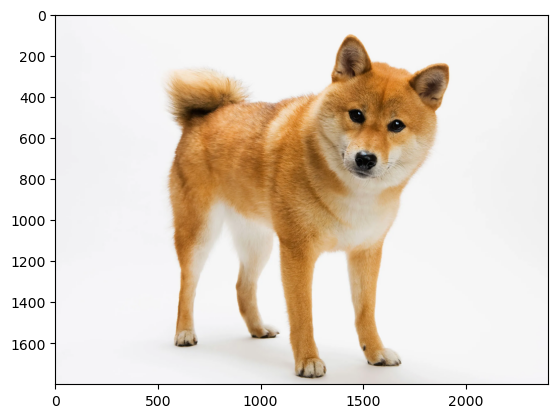

In [79]:
img = mpimg.imread('images//doggo.jpg')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

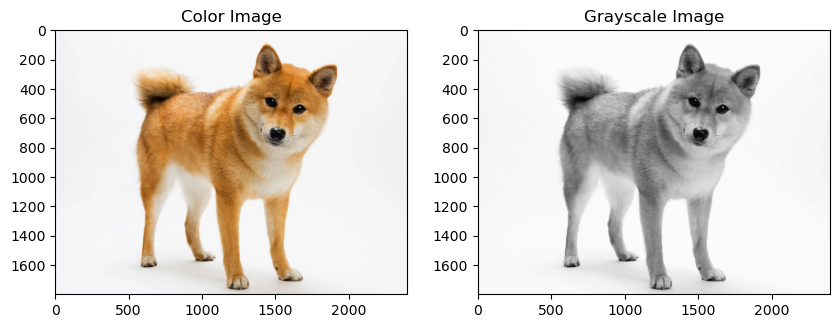

In [80]:
from PIL import Image

def rgb_to_grayscale(image_path):
    image = Image.open(image_path)
    
    img_array = np.array(image)
    
    reshaped_img = img_array.reshape((-1, 3))
    
    grayscale_values = np.dot(reshaped_img, [0.2126, 0.7152, 0.0722])
    grayscale_img = grayscale_values.reshape(img_array.shape[:2])
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_array)
    plt.title("Color Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(grayscale_img, cmap='gray')
    plt.title("Grayscale Image")
    
    plt.show()

rgb_to_grayscale('images//doggo.jpg')

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [81]:
def linear_interpolation(x1, x2, lambdas):
    lambdas_reshaped = lambdas.reshape(-1, 1)
    #print(lambdas_reshaped)
    interpolations = lambdas_reshaped * x1 + (1 - lambdas_reshaped) * x2
    
    return interpolations

x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
lambdas = np.linspace(0, 1, 11)

print(linear_interpolation(x1, x2, lambdas))

[[4.  5.  6. ]
 [3.7 4.7 5.7]
 [3.4 4.4 5.4]
 [3.1 4.1 5.1]
 [2.8 3.8 4.8]
 [2.5 3.5 4.5]
 [2.2 3.2 4.2]
 [1.9 2.9 3.9]
 [1.6 2.6 3.6]
 [1.3 2.3 3.3]
 [1.  2.  3. ]]
